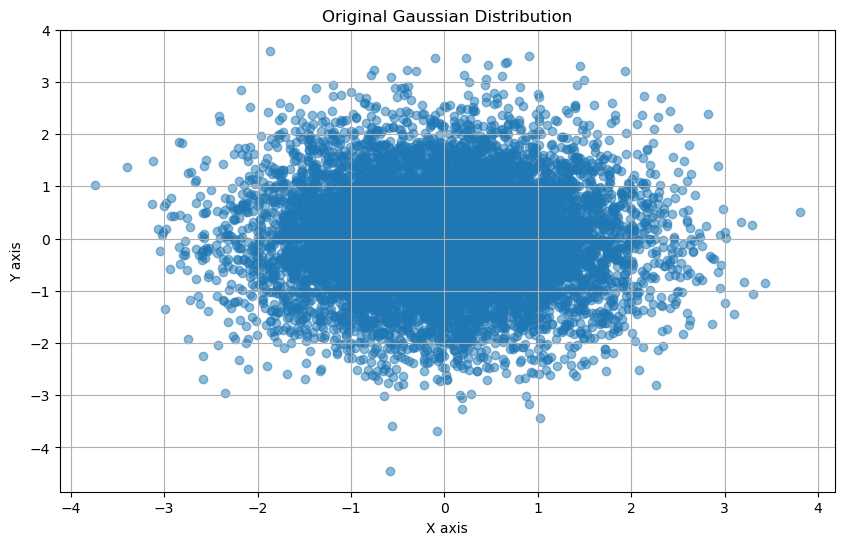

array([[ 0.97536551, -0.00761027],
       [-0.00761027,  0.98625623]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a 2D Gaussian Distribution
np.random.seed(0)  # For reproducibility
x = np.random.normal(0, 1, 10000)
y = np.random.normal(0, 1, 10000)
data = np.vstack([x, y]).T

# Calculating the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Plotting the original distribution
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title("Original Gaussian Distribution")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()

# Details of the covariance matrix
cov_matrix



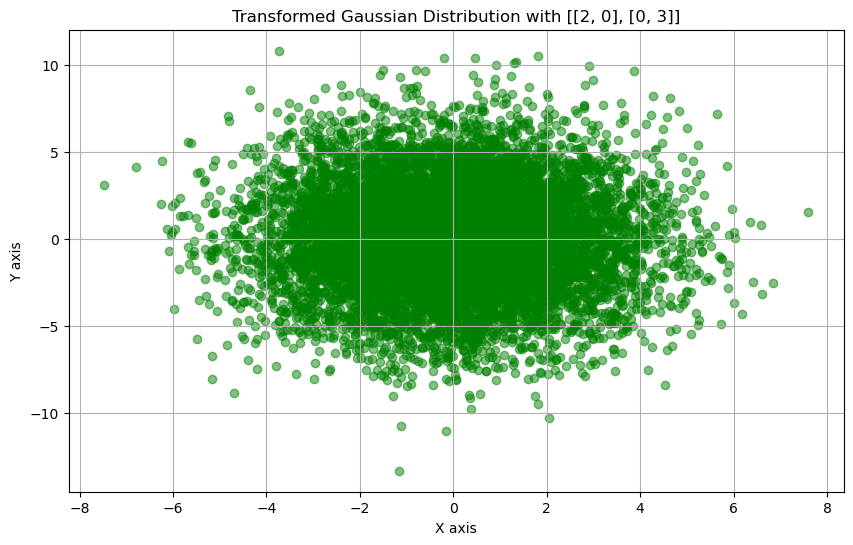

array([[ 3.90146205, -0.04566159],
       [-0.04566159,  8.87630603]])

In [3]:
# Transformation matrix
transformation_matrix_1 = np.array([[2, 0], [0, 3]])

# Applying the transformation
transformed_data_1 = data.dot(transformation_matrix_1)

# Calculating the covariance matrix for the transformed dataset
cov_matrix_transformed_1 = np.cov(transformed_data_1, rowvar=False)

# Plotting the transformed distribution
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_1[:, 0], transformed_data_1[:, 1], alpha=0.5, color='green')
plt.title("Transformed Gaussian Distribution with [[2, 0], [0, 3]]")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()

# Details of the transformed covariance matrix
cov_matrix_transformed_1



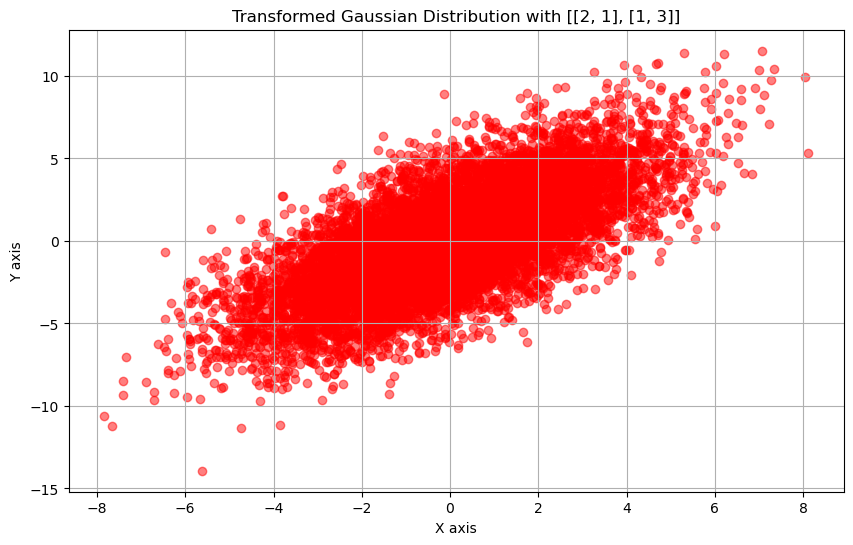

array([[4.85727721, 4.85622784],
       [4.85622784, 9.80600994]])

In [4]:
# Second transformation matrix
transformation_matrix_2 = np.array([[2, 1], [1, 3]])

# Applying the second transformation
transformed_data_2 = data.dot(transformation_matrix_2)

# Calculating the covariance matrix for the new transformed dataset
cov_matrix_transformed_2 = np.cov(transformed_data_2, rowvar=False)

# Plotting the second transformation
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2[:, 0], transformed_data_2[:, 1], alpha=0.5, color='red')
plt.title("Transformed Gaussian Distribution with [[2, 1], [1, 3]]")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()

# Details of the second transformed covariance matrix
cov_matrix_transformed_2



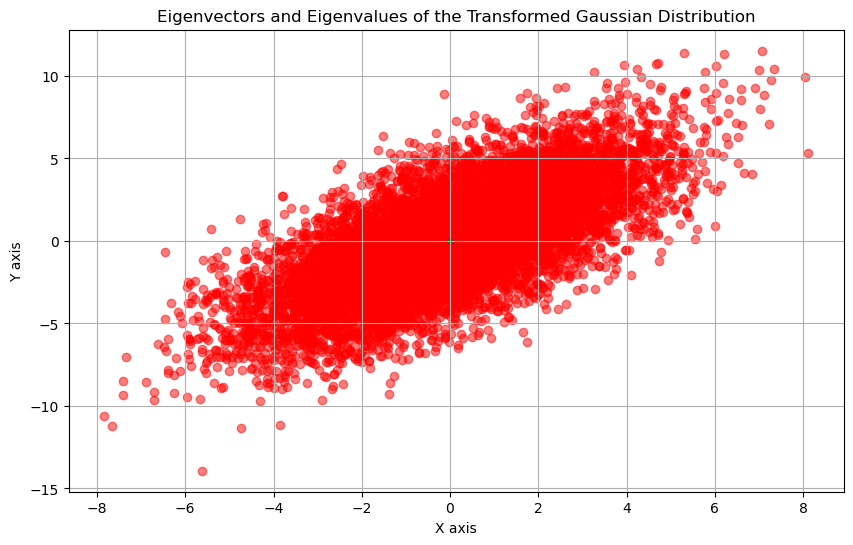

(array([ 1.88137407, 12.78191309]),
 array([[-0.85263994, -0.52249893],
        [ 0.52249893, -0.85263994]]))

In [6]:
# Calculating eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_transformed_2)

# Plotting the transformed distribution with eigenvectors
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2[:, 0], transformed_data_2[:, 1], alpha=0.5, color='red')
origin = [0, 0]  # Origin point for both eigenvectors

# Plotting each eigenvector separately
for i in range(len(eigenvectors)):
    plt.quiver(*origin, eigenvectors[0, i], eigenvectors[1, i], color=['blue', 'green'][i], 
               scale=20, scale_units='xy', angles='xy')

plt.title("Eigenvectors and Eigenvalues of the Transformed Gaussian Distribution")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()

# Details of eigenvalues and eigenvectors
eigenvalues, eigenvectors


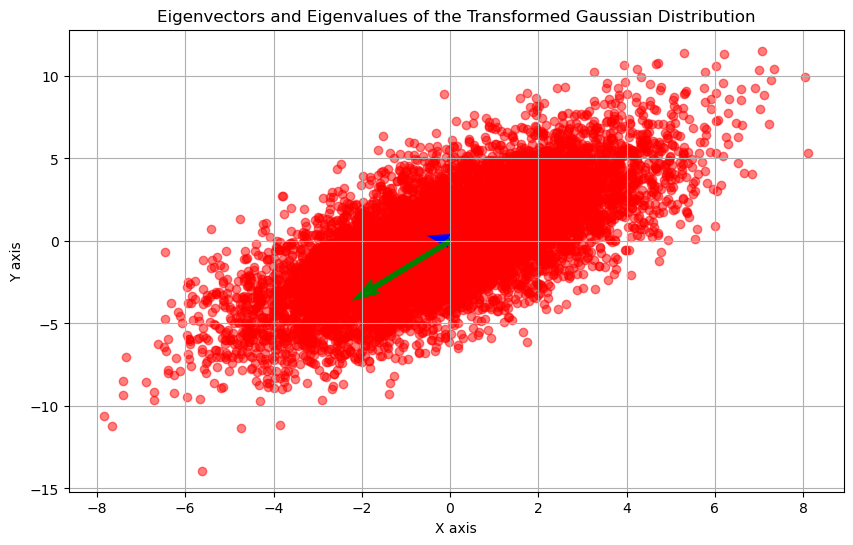

(array([ 1.88137407, 12.78191309]),
 array([[-0.85263994, -0.52249893],
        [ 0.52249893, -0.85263994]]))

In [7]:
# Correcting the plot for eigenvectors

# Scale factor for eigenvectors
scale_factor = 10

# Plotting the transformed distribution with correctly scaled eigenvectors
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2[:, 0], transformed_data_2[:, 1], alpha=0.5, color='red')

# Plotting eigenvectors scaled by their eigenvalues
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i] * eigenvalues[i] * scale_factor
    plt.quiver(*origin, vec[0], vec[1], color=['blue', 'green'][i], scale=30, scale_units='xy', angles='xy')

plt.title("Eigenvectors and Eigenvalues of the Transformed Gaussian Distribution")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()

# Details of eigenvalues and eigenvectors
eigenvalues, eigenvectors



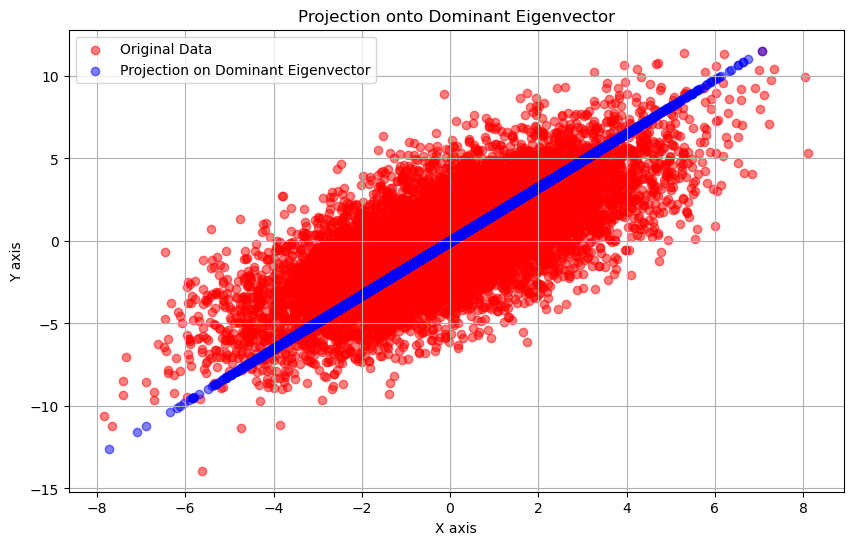

In [8]:
# Identifying the dominant eigenvector (with the largest eigenvalue)
dominant_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]

# Projecting the data onto the dominant eigenvector
projection = transformed_data_2.dot(dominant_eigenvector)[:, np.newaxis] * dominant_eigenvector[np.newaxis, :]

# Plotting the original transformed data and the projection
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2[:, 0], transformed_data_2[:, 1], alpha=0.5, color='red', label='Original Data')
plt.scatter(projection[:, 0], projection[:, 1], alpha=0.5, color='blue', label='Projection on Dominant Eigenvector')
plt.title("Projection onto Dominant Eigenvector")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.grid(True)
plt.show()

